## 로지스틱 회귀 - 분류

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigmoid(x, a=1, b=0):
    return (1. / (1+np.exp(-a * (x - b))))

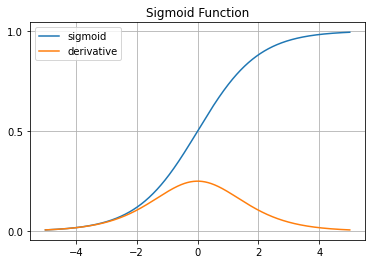

In [7]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative')
plt.title('Sigmoid Function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

In [8]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)

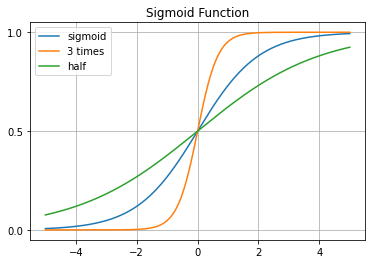

In [9]:
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3 times')
plt.plot(xs, y_half, label='half')
plt.title('Sigmoid Function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

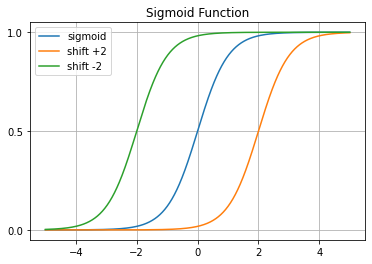

In [10]:
ys = sigmoid(xs, a=2)
y_plus_2 = sigmoid(xs, a=2, b=2)
y_minus_2 = sigmoid(xs, a=2, b=-2)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y_plus_2, label='shift +2')
plt.plot(xs, y_minus_2, label='shift -2')
plt.title('Sigmoid Function')
plt.yticks([0, 0.5, 1])
plt.grid()
plt.legend()
plt.show()

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [12]:
# Need to Normalization or Regularization for Logistic Regression 
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2022
)

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2022)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [15]:
#  계수
lr.coef_

array([[-0.34405498, -0.48237478, -0.3341254 , -0.42915846, -0.07879762,
         0.56207448, -0.73975027, -0.60531031,  0.04342698,  0.15496439,
        -1.25355709,  0.01114107, -0.78491641, -0.96111243, -0.26653613,
         0.90404346,  0.08264883, -0.33151113,  0.57540241,  0.435543  ,
        -0.9384629 , -1.11676756, -0.79996886, -0.95345339, -0.66727363,
         0.18915746, -0.93918052, -1.03420112, -1.16072205, -0.16299362]])

In [16]:
# 절편
lr.intercept_

array([0.18666884])

In [18]:
# X_test[0] 가 1이 될 확률
val = np.dot(lr.coef_, X_test[0]) + lr.intercept_
val

array([4.73309707])

In [20]:
# X_test[0]가 1이 될 확률
sigmoid(val)

array([0.99127757])

In [19]:
lr.predict(X_test[0].reshape(1,-1))

array([1])

In [21]:
lr.predict_proba(X_test[:5])

array([[8.72242699e-03, 9.91277573e-01],
       [2.41622685e-01, 7.58377315e-01],
       [1.00000000e+00, 1.21217433e-10],
       [6.40861429e-07, 9.99999359e-01],
       [3.25148309e-04, 9.99674852e-01]])

#### 다중 분류

In [23]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, random_state=2022
)

In [24]:
lr_2 = LogisticRegression(random_state=2022)
lr_2.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [26]:
lr_2.predict_proba(X_test[:5])

array([[9.99279600e-01, 4.12995370e-04, 3.07404430e-04],
       [9.95459920e-01, 3.04646714e-03, 1.49361273e-03],
       [8.63617063e-03, 1.34269693e-04, 9.91229560e-01],
       [7.75565213e-03, 3.10436345e-03, 9.89139984e-01],
       [9.94151690e-04, 9.89722631e-01, 9.28321721e-03]])

In [27]:
lr_2.predict(X_test[:5])

array([0, 0, 2, 2, 1])

In [28]:
lr_2.coef_

array([[ 0.73292343,  0.24529243,  0.4625104 , -0.83327624,  0.03787191,
         0.2198092 ,  0.64010231, -0.16699086,  0.15389364,  0.14377882,
         0.12029171,  0.67911303,  1.0101582 ],
       [-0.91395256, -0.48165767, -0.83332071,  0.59074468, -0.08596402,
        -0.01348885,  0.34230068,  0.17131402,  0.23534429, -0.96864414,
         0.66757359,  0.04717943, -1.09745204],
       [ 0.18102913,  0.23636524,  0.37081031,  0.24253157,  0.04809211,
        -0.20632035, -0.98240299, -0.00432316, -0.38923793,  0.82486532,
        -0.7878653 , -0.72629246,  0.08729384]])

In [29]:
lr_2.intercept_

array([ 0.38394662,  0.67109374, -1.05504036])

In [33]:
val_2 = np.dot(lr_2.coef_, X_test[0]) + lr_2.intercept_
val_2

array([ 5.29265972, -2.49869379, -2.79396593])

In [34]:
sigmoid(val_2)

array([0.99499679, 0.0759498 , 0.05765112])

In [35]:
# 다중 분류에서는 시그모이드 함수를 적용하지 않음, 소프트맥스 함수 적용
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [36]:
softmax(np.array([0,0,0]))

array([0.33333333, 0.33333333, 0.33333333])

In [37]:
softmax(val_2)

array([9.9927960e-01, 4.1299537e-04, 3.0740443e-04])